In [2]:
import os,shutil
# 原始目录所在的路径
original_dataset_dir='E://机器学习//fruit//train'
# 数据集分类后的目录
base_dir='E://机器学习//fruit//find_fruit'
os.mkdir(base_dir)

# # 训练、验证、测试数据集的目录
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validaiton')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

# 西瓜训练图片所在目录
train_xigua_dir = os.path.join(train_dir, 'xigua')
os.mkdir(train_xigua_dir)

# 哈密瓜训练图片所在目录
train_hami_dir = os.path.join(train_dir, 'hami')
os.mkdir(train_hami_dir)

# 西瓜验证图片所在目录
validation_xigua_dir = os.path.join(validation_dir, 'xigua')
os.mkdir(validation_xigua_dir)

# 哈密瓜验证数据集所在目录
validation_hami_dir = os.path.join(validation_dir, 'hami')
os.mkdir(validation_hami_dir)

# 西瓜测试数据集所在目录
test_xigua_dir = os.path.join(test_dir, 'xigua')
os.mkdir(test_xigua_dir)

# 哈密瓜测试数据集所在目录
test_hami_dir = os.path.join(test_dir, 'hami')
os.mkdir(test_hami_dir)

# 将前1000张西瓜图像复制到train
fnames = ['xigua.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_xigua_dir, fname)
    shutil.copyfile(src, dst)

# 将剩下500张西瓜图像复制到validation
fnames = ['xigua.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_xigua_dir, fname)
    shutil.copyfile(src, dst)

# 将剩下500张西瓜图像复制到test_xigua_dir
fnames = ['xigua.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_xigua_dir, fname)
    shutil.copyfile(src, dst)

# 将前1000张哈密瓜图像复制到train_hami_dir
fnames = ['hami.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_hami_dir, fname)
    shutil.copyfile(src, dst)

# 将前1000张哈密瓜图像复制到train_hami_dir
fnames = ['hami.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_hami_dir, fname)
    shutil.copyfile(src, dst)
    
# 将下500张哈密瓜图像复制到test_hami_dir
fnames = ['hami.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_hami_dir, fname)
    shutil.copyfile(src, dst)


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import optimizers

In [7]:
# 模型调整
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))    
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 所有图像将按1/255重新缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 这是目标目录
        train_dir,
        # 所有图像将调整为150x150
        target_size=(150, 150),
        batch_size=20,
        # 因为我们使用二元交叉熵损失，我们需要二元标签
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 54s 539ms/step - loss: 0.6919 - acc: 0.5300 - val_loss: 0.6823 - val_acc: 0.5360
Epoch 2/30
100/100 [==============================] - 57s 574ms/step - loss: 0.6735 - acc: 0.5785 - val_loss: 0.6535 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 57s 573ms/step - loss: 0.6580 - acc: 0.6120 - val_loss: 0.6491 - val_acc: 0.6000
Epoch 4/30
100/100 [==============================] - 59s 594ms/step - loss: 0.6309 - acc: 0.6385 - val_loss: 0.6548 - val_acc: 0.6030
Epoch 5/30
100/100 [==============================] - 64s 640ms/step - loss: 0.5935 - acc: 0.6780 - val_loss: 0.6090 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 71s 713ms/step - loss: 0.5671 - acc: 0.7120 - val_loss: 0.6546 - val_acc: 0.6180
Epoch 7/30
100/100 [==============================] - 66s 656ms/step - loss: 0.5351 - acc: 0.7340 - val_loss: 0.5637 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 7

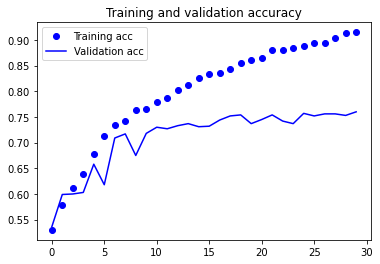

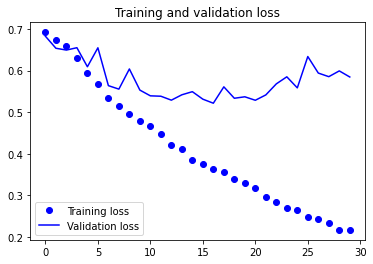

In [11]:
# 绘制图形
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()